<div dir="rtl">
    <h2>
        تمرین اول
        (۱۰۰ + ۱۰ امتیاز)
    </h2>
</div>
<p></p>
<div dir="rtl">
بذارید یه حدسی بزنم، خیلی از شما علاقه دارید که دانشمند داده بشید. شاید حدسم غلط باشه ولی خب ما دوست داریم شغل آیندمون در ارتباط با این موضوع باشه و برای همین با خودمون گفتیم که از شما کمک بگیریم. 
مساله‌ی اول برای انجام کار مورد علاقه، پیدا کردن اون کاره! برای اینکه با چشم باز بریم سراغ کاری که دوست داریم، سعی کردیم از یه سایت کاریابی یه سری اطلاعات استخراج کنیم؛ اما خب همه می‌دونیم داده خام خیلی بدرد نمی‌خوره و برای همین به کمک شما نیاز داریم.
</div>

<div dir="rtl">
توجه کنید که توی این تمرین قراره کد بزنید و به هزار روش میشه یک کد روز زد! از این هزار روش معمولا ۹۹۵ تاش روش‌های خوبی نیستن. یا کد اسپاگتی هستن یا از توانایی‌های زبون و فریم ورک استفاده نشده یا نتیجه خیلی مطلوبی به نمایش نمیذارن و ... ما برای اینکه از رفتن به اون ۹۹۵ راه تقریبا اشتباه جلوگیری کنیم یه سری خواسته داریم:
    <ul>
    <li/>
        به هیچ عنوان از حلقه‌ها استفاده نکنید.
    <li/>
            از توانایی‌های کتابخونه pandas استفاده کنید.
    <li/>
    بطور کلی کد پایتون خالی نزنید. تقریبا همه کارهایی که کتابخونه‌های پایتون می‌کنند رو خود شمام می‌تونید بکنید ولی چرخ رو از اول اختراع نکنید. اگر امکان انجام کاری با pandas وجود داره اون کار رو بصورت دیگه انجام ندید.
    <li/>
        نمودارها در جایی که انتخاب نوع نمودار با شماست باید بطور واضح، منظوری رو بیان کنن. یعنی بطور شانسی داده‌ها رو داخل یک نمودار رندم قرار ندید بلکه کمی برای انتخاب نمودارهاتون سلیقه و دقت به خرج بدید.
    </ul>
</div>

<div dir="rtl">
در مرحله اوّل لازمه بتونید اطلاعات رو لود کنید. اطلاعات توی فایل
usjobs.csv همراه این تمرین براتون گذاشته شده.
این اطلاعات رو لود کنید و ۵ سطر اول اون رو به ما نشون بدید که بتونیم یه ایده‌ای راجع به این فایل داشته باشیم.
(۳ امتیاز)    
</div>

In [99]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np


df = pd.read_csv("usjobs.csv")
df.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


<div dir="rtl">
یه اتفاق بدی که معمولا برای دیتاست‌ها میوفته اینه که یک‌سری از داده‌ها تهی هستن و این کار معمولا تحلیل داده رو برای 
  ما سخت می‌کنه.  پس بیاید قبل از هرکاری ببینیم چقدر این داده‌ها تهی هستن.  برای این کار تعداد و درصد داده‌های تهی هر ستون رو بگید. 
(۴ امتیاز)
</div>

In [100]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_val_count = df.isnull().sum(axis = 0)

missing_value_df = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)

data_frame =  pd.DataFrame({'columns' : df.keys(), 'nan Values': missing_val_count , 'percent_missing': percent_missing})
data_frame


,columns,nan Values,percent_missing
Unnamed: 0,Unnamed: 0,0,0.000000
Job Title,Job Title,0,0.000000
Salary Estimate,Salary Estimate,1,0.044385
Job Description,Job Description,0,0.000000
Rating,Rating,0,0.000000
Company Name,Company Name,1,0.044385
Location,Location,0,0.000000
Headquarters,Headquarters,172,7.634265
Size,Size,163,7.234798
Founded,Founded,660,29.294274


In [101]:
import re
import math

<div dir="rtl">
    همون‌طور که می‌بینید در بعضی از ستون‌ها بیش از ۵۰ درصد داده تهی هستن. ستون‌هایی که این ویژگی رو دارن از مجموعه داده‌ها حذف کنید.
    (۴ امتیاز)
</div>

In [102]:
#df.dropna(axis=1, thresh=int(0.5*len(df)))
# one of these can be used, line 1 or line 3 & 4
df.drop('Competitors', axis=1, inplace=True)
df.drop('Easy Apply', axis=1, inplace=True)

<div dir="rtl">
در بعضی از ستون‌ها فقط یک داده‌ی تهی وجود داره. سطرهای مربوط به این داده‌های خالی رو از مجموعه‌ی داده‌ها حذف کنید و ابعاد مجموعه داده‌های جدید را نمایش بدید.
    (۴ امتیاز)
</div>

In [103]:
df.shape
df.drop(df['Salary Estimate'].isnull().to_list().index(True), 0, inplace=True)
df.drop(df['Company Name'].isnull().to_list().index(True), 0, inplace=True)
df.shape
df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD)
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD)
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD)
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,2248,RQS - IHHA - 201900004460 q Data Security Analyst,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable
2249,2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935.0,Company - Public,Wholesale,Business Services,$10+ billion (USD)
2250,2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",0.0,Spiceorb,"Denver, CO",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2251,2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD)


<div dir="rtl">
    در سلول زیر روش‌های متداول برای حل مشکل 
    Data Missing
    رو به طور کامل شرح بدید و برای هر روش بیان شده کاربردهاش رو توی این مجموعه داده بررسی کنید.
    (۴ روش کافیه)
    (۱۲ امتیاز)
</div>

<div dir="rtl">
    ...روش های مختلفی برای حل این مشکل وجود دارد برای مثال همین روشی که در اینجا گفته شده یعنی حذف ستون هایی که بیش از ۵۰ درصد داده های گم شده است، یا اینکه با حذف سطر هایی که تعدادNan های آن سطر زیاد است می‌توانیم دیتایی که اطلاعات مفیدی برای ما ندار را حذف 
      کنیم و یا روش های دیگر مانند در دیتاهایی که صفر برای نبودن و عدم وجود یک متغیر استفاده شده است، 
این کار با درنظرگرفتن تمام مقادیر از دست رفته با صفر ، میانگین متوسط ​​متغیرهای کمی ، یا متداول ترین مقدار برای متغیرهای طبقه ای انجام می شود.
در نتیجه ، ما می توانیم یک متغیر جدید ایجاد کنیم که شاخص عدم وجود است و آن را در مدل برای پیش بینی پاسخ بگنجانیم. .و یا روش هایی مانند این با جایگزینی مقادیر از دست رفته با مقادیر پیش بینی شده از یک مدل بر اساس سایر پیش بینی های مشاهده شده کار می کند.
k الگوریتم نزدیکترین همسایه اغلب برای محاسبه مقدار از دست رفته بر اساس شباهت آن به نقاط مجموعه آموزش استفاده می شودو یا روش دیگری که در بعضی از موارد با توجه به نوع دیتا می‌توان از آن استفاده کرد قرار دادن متغیر با یک مقدار رندوم مشاهده شده در یک متغیر است که در برخی از شرایط می‌تواند کار ساز باشد، در همه‌ی این روش ها مهم ترین موضوعی که باید در نظر گرفته شود این است که تنها در صورتی می‌توانیم از این روش ها استفاده کنیم که به دیتاست تغییر بدی وارد نشود و بتوان از آن به درستی استفاده کرد...
</div>

<div dir="rtl">
تا اینجای کار فقط داشتیم داده‌هامون رو تمیز می‌کردیم. از اینجا به بعد می‌خوایم کمی روی اونها کار کنیم. یکی از 
فاکتورهای مهم توی کار کردن میزان حقوقه. پس بیاید و ستون تخمین حقوق رو به دو ستون تبدیل کنید که حداقل و حداکثر حقوق 
درخواستی در اون درج شده.
سپس ستون میانگین حقوق را از این دو ستون جدید به دست بیارید و در انتها پنج داده‌ی اول مجموعه داده رو نمایش بدید.
    (۸ امتیاز)
</div>

In [104]:

df['Avg_salary'] = df['Salary Estimate'].apply(lambda x: re.search('\$(.*)K', x).group(1))
df['Min_salary'] = df['Avg_salary'].apply(lambda x: int(re.search('(.*)K', x).group(1)))
df['Max_salary'] = df['Avg_salary'].apply(lambda x: int(re.search('\$(.*)', x).group(1)))

df['Avg_salary'] = (df['Min_salary'] + df['Max_salary']) / 2

df.drop('Salary Estimate', axis=1, inplace=True)

df

,Unnamed: 0,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Avg_salary,Min_salary,Max_salary
0,0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),51.5,37,66
1,1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),51.5,37,66
2,2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,51.5,37,66
3,3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),51.5,37,66
4,4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),51.5,37,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,2248,RQS - IHHA - 201900004460 q Data Security Analyst,Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,91.0,78,104
2249,2249,Senior Data Analyst (Corporate Audit),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935.0,Company - Public,Wholesale,Business Services,$10+ billion (USD),91.0,78,104
2250,2250,"Technical Business Analyst (SQL, Data analytic...","Title: Technical Business Analyst (SQL, Data a...",0.0,Spiceorb,"Denver, CO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,78,104
2251,2251,"Data Analyst 3, Customer Experience",Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),91.0,78,104


<div dir="rtl">
    می‌خوایم یه آمار کلی از حقوق کارها داشته باشیم. کاری که می‌خوایم بکنید اینه که ۵٪ از کارها با بالاترین میانگین حقوق و ۵٪ از کارها با پایین‌ترین میانگین حقوق رو حذف کنید و بعدش یه آمار کلی از میانگین حقوق‌ها بدید و همچنین بگید که بنظرتون چرا ۵٪ از بالا و ۵٪ از پایین رو حذف کردیم؟ آمار کلی‌ای که می‌خوایم شامل:  mean, std, min, max می‌شه.
    (۶ امتیاز)
</div>

<div dir="rtl">
    ...
۵ درصد اول و ۵ درصد آخر هر دیتاهایی معمولا داده‌های پرت یک دیتا شمرده می‌شوند چون برای مثال ، اگر بخواهیم میانگین حقوق افراد را حساب کنیم به صورتی که آمار دقیق تری داشته باشیم افرادی که حقوق خیلی بیشتری دارند، برای مثال مدیران ، همچنین افرادی که کنترین حقوق 
را می‌گیرند به صورتی که با عموم دادهای وسط شکاف زیادی داشته باشد، باعث می‌شوند که آمار نا دقیق تری داشته باشیم و میانگین و میانه را به سمت بالاتری ببرند در صورتی که عموم افراد فاصله‌ی زیادی از این پارامتر ها بگیرند. 
</div>

In [105]:
#first we have to sort hte salaries based on the avg Salary
df.sort_values(by=['Avg_salary'], inplace=True, ignore_index=True)
#drop the 5 percent of the data set

max_salary = np.quantile(df['Avg_salary'], 0.95)
min_salary = np.quantile(df['Avg_salary'], 0.05)

drop_per = list(df['Avg_salary'] > max_salary) or list(df['Avg_salary'] < min_salary)
df = df.drop(df[drop_per].index)
df.describe()


,Unnamed: 0,Rating,Founded,Avg_salary,Min_salary,Max_salary
count,2140.000000,2140.000000,1508.000000,2140.000000,2140.000000,2140.000000
mean,1105.929439,3.272336,1977.748674,68.885280,51.678505,86.092056
std,650.974495,1.371254,48.399492,19.168498,16.246420,23.928607
min,0.000000,0.000000,1682.000000,33.500000,24.000000,38.000000
25%,534.750000,3.100000,1969.000000,56.000000,41.000000,69.000000
50%,1098.500000,3.600000,1997.000000,68.000000,49.000000,86.000000
75%,1662.250000,4.000000,2006.000000,79.500000,60.000000,102.000000
max,2252.000000,5.000000,2019.000000,120.000000,98.000000,151.000000


<div dir="rtl">
در ادامه میانگین حقوق پیشنهادی شرکت‌ها رو به دست بیارید (دقت کنید برای هر شرکت باید میانگین رو روی کار‌های مختلف اون شرکت حساب کنید و در نهایت به یک عدد برسید) و بعدش نمودار توزیع تخمینی رو رسم کنید.
    (۷ امتیاز)
    </div>

Company Name
1                                     41.5
1199SEIU Funds\n3.2                   63.5
1872 Consulting\n5.0                  59.0
2000 east westmoreland st llc         59.5
212 Factors                           75.5
                                      ... 
silverXis inc\n4.0                    68.0
smlogics                              51.0
softsnippets                          38.5
xentity corporation\n5.0              70.0
zz-Tarzana Treatment Centers, Inc.    73.0
Name: Avg_salary, Length: 1447, dtype: float64


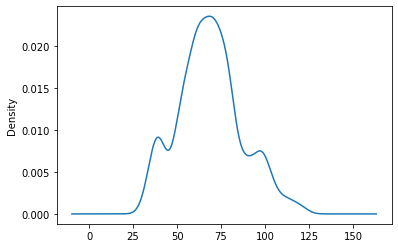

In [106]:
company_avg = df.groupby(by=['Company Name'])['Avg_salary'].mean()
sorted_avg_salary  = company_avg.sort_values()
print(company_avg_salary)
sorted_avg_salary.plot.kde()

<div dir="rtl">
حالا یه دسته‌بندی از رتبه بندی
    (Rating)
    شرکت‌ها و میانگین حقوق اون‌ها بدید.
    در ابتدا به جدولی که در قسمت قبل برای شرکت‌ها به دست آوردید،
    ستون Rating را اضافه کنید.
    حال
    توجه کنید که توی این دسته‌بندی ما حدود 
    Rating
    رو 
    می‌خوایم در نظر بگیریم. پس برای این کار هر ۰.۵ امتیاز رو توی یک دسته قرار میدیم. یعنی شرکت‌ها با امتیاز ۰ تا ۰.۴۹ توی یه دسته و شرکت‌ها با امتیاز ۰.۵ تا ۱ توی یه دسته و ... تا شرکتها با امتیاز ۴.۵ تا ۵ توی یه دسته قرار می‌گیرن. بعد از این دسته‌بندی میانگین حقوق هر دسته رو بدست بیارید و همه این دسته‌ها رو توی یه نمودار معنادار نمایش بدید.
   (۱۰ امتیاز)
 </div>

<Figure size 432x288 with 0 Axes>

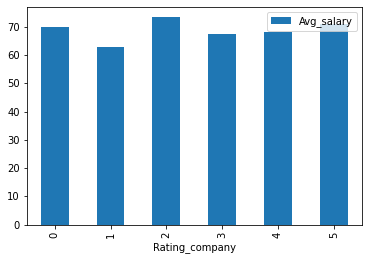

In [107]:
import matplotlib.pyplot as plt
df['Rating_company'] = df['Rating'].apply(round)
sorted_avg_salary = df[['Company Name', 'Avg_salary', 'Rating_company']].groupby('Company Name').mean()
sorted_avg_salary = sorted_avg_salary.sort_values(by=['Avg_salary'])
rate_salary = sorted_avg_salary[['Avg_salary', 'Rating_company']].groupby('Rating_company').mean()
plt.figure()
rate_salary.plot(kind = 'bar')
plt.show()



<div dir="rtl">
    به جدول شرکت‌ها ستون
    Revenue
    را اضافه کنید.
    سپس میانگین حقوق رو برای سطوح مختلف درآمدی شرکت‌ها در نمودار
    boxplot
    نمایش دهید.
.راستی حواستون به داده‌های تهی این ستون باشه و با توجه به مقادیر دیگر این ستون بهترین تصمیم رو بگیرید
    (۱۰ امتیاز)
</div>

['$1 to $2 billion (USD)', '$1 to $5 million (USD)', '$10 to $25 million (USD)', '$10+ billion (USD)', '$100 to $500 million (USD)', '$2 to $5 billion (USD)', '$25 to $50 million (USD)', '$5 to $10 billion (USD)', '$5 to $10 million (USD)', '$50 to $100 million (USD)', '$500 million to $1 billion (USD)', 'Less than $1 million (USD)', 'Unknown / Non-Applicable']


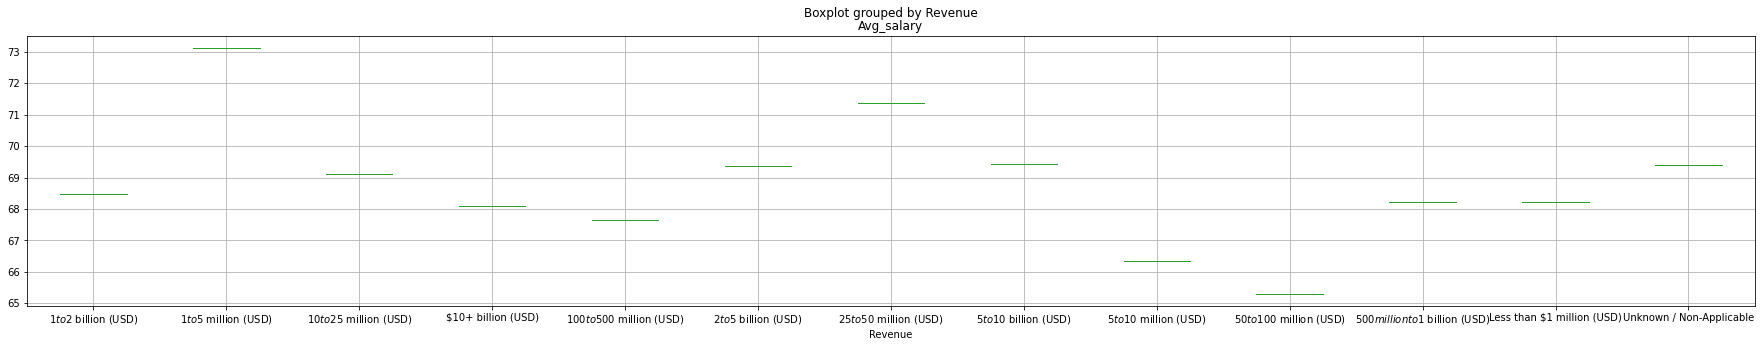

In [108]:
revenue_salary = df.groupby(by=['Revenue'])['Avg_salary'].mean().to_frame()
revs = revenue_salary.index.to_list()
print(revs)
boxplot = revenue_salary.boxplot(column=['Avg_salary'] , by='Revenue', figsize = (30 , 5))

<div dir="rtl">
این مرحله از کارتون تکراریه و همون کاری که توی مرحله‌ی قبل کردید رو این بار با سایز شرکت‌ها بکنید، ببینیم
می‌شه به جمع بندی از حقوق شرکت‌ها رسید؟
باز هم توجه به داده‌های تهی مهمه که اشکالی در نمایش داده‌هاتون ایجاد نکنند و برای این مرحله هم از  boxplot استفاده کنید.  
    (۵ امتیاز)
</div>

['1 to 50 employees', '10000+ employees', '1001 to 5000 employees', '201 to 500 employees', '5001 to 10000 employees', '501 to 1000 employees', '51 to 200 employees', 'Unknown']


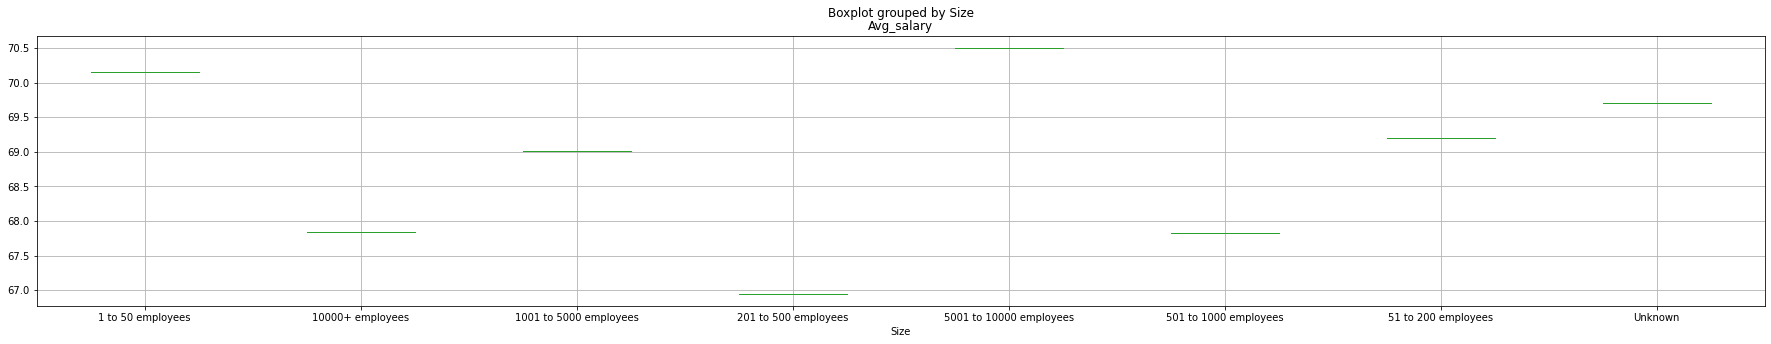

In [109]:
size_salary = df.groupby(by=['Size'])['Avg_salary'].mean().to_frame()
revs = size_salary.index.to_list()
print(revs)
boxplot = size_salary.boxplot(column=['Avg_salary'] , by='Size', figsize = (30 , 5))

<div dir="rtl">
    توی هر سه مرحله‌ی قبل همبستگی رو حساب کنید و ببینید که آیا این هیچ ارتباطی بین میزان حقوق و آیتم‌های معرفی شده وجود داره؟
(۵ امتیاز)    
</div>

In [87]:
rate_salary.reset_index().corr()


,Rating_company,Avg_salary
Rating_company,1.000000,0.236256
Avg_salary,0.236256,1.000000


In [110]:
size_salary.reset_index()


df["Revenue"].replace({
    "1to2 billion (USD)":1.5,
    "1to5 million (USD)":3,
    "10to25 million (USD)":17.5,
    "$10+ billion":10,
    #the rest
})
df["Size"].replace({"1 to 50 employees": 25,
                    "10000+ employees": 10000,
                    "1001 to 5000 employees": 3000,
                    "201 to 500 employees": 350,
                    "5001 to 10000 employees": 7500,
                    "501 to 1000 employees": 750,
                    "51 to 200 employees": 125,
                    "Unknown": 0}, inplace=True)


<div dir="rtl">
    ...
برای فهمیدن میزان در ارتباط بودن دو متغیر به هم دیگر لازم است که .corr را روی آن ها صدا بزنیم، عدد حاصل عددی بین -۱ تا ۱ خواهد بود و هرچقدر که این عدد به۰ نزدیک تر باشد ینی آن دو متغیر بی ربط تر هستند نسبت به هم و هر چقدر که این عدد به ۱ یا -۱ نزدیک باشد به این معنا خواهد بود که دو متغیر به هم ربط دارند، اگر منفی باشد یعنی رابطه‌ی برعکس دارند و با زیاد شدن یکی دیگری کم می‌شود و اگر مثبت بشه به این معنا است که رابطه‌ی مستقیم دارند برای مثال در حالت اول که ۰.۲ شده است به صفر نزدیک تر است .
</div>

<div dir="rtl">
تا الان ما یه ایده‌ای راجع به شرکت‌های مختلف و همچنین میزان حقوقشون و رابطه حقوق با اندازه شرکت و امتیاز شرکت و درآمد سالانه شرکت داریم.
</div>
<div dir="rtl">
چیزی که الان می‌مونه پیدا کردن یه شهودی از جایگاه جغرافیایی شرکت‌هاست. برای این کار از فایل uscities.csv کمک بگیرید. اول این فایل رو باز کنید و ۵ سطر اولش رو لیست کنید.
</div>

In [112]:
uscities_df = pd.read_csv('uscities.csv')
uscities_df.head(5)

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220.0,10715.0,polygon,False,True,America/New_York,1,11229 11226 11225 11224 11222 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807.0,3276.0,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8373,-87.6862,8604203.0,4574.0,polygon,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7839,-80.2102,6445545.0,5019.0,polygon,False,True,America/New_York,1,33129 33125 33126 33127 33128 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7936,-96.7662,5743938.0,1526.0,polygon,False,True,America/Chicago,1,75287 75098 75233 75254 75251 75252 75253 7503...,1840019440


<div dir="rtl">
حالا با توجه به ستون
Location
توی فایل اولیه‌ی ما و همچنین با توجه به
ستون‌های state_id و city توی فایل uscities.csv، جدولی شامل ستون‌های
    Location, lat, lng
    به دست بیارید که مقادیر ستون Location 
    یکتا هستند.
    (اگر چند مختصات مختلف برای هر شهر بدست اومد به دلخواه از یکی از آن‌ها استفاده کنید)
    (۷ امتیاز)
    </div>

In [113]:
city_df = uscities_df.groupby(['city', 'state_id']).mean()
locations = list(map(", ".join, city_df.index))

loc_df = pd.DataFrame({'Location': locations,'lng': city_df['lng'].values, 'lat': city_df['lat'].values })
loc_df.head(5)

,Location,lng,lat
0,"Aaronsburg, PA",-78.72615,40.4575
1,"Abanda, AL",-85.52530,33.0926
2,"Abbeville, AL",-85.25280,31.5664
3,"Abbeville, GA",-83.30680,31.9925
4,"Abbeville, LA",-92.12650,29.9750


<div dir="rtl">
مقادیر
lat و long 
بدست اومده تو مرحله قبل رو به جدول اصلی کاریابی‌مون اضافه کنید بطوری‌که برای هر فرصت شغلی ما مقدار مورد نظر این دو 
    رو داشته باشیم
.
    (۵ امتیاز)    
</div>

In [114]:
df_loca = df.merge(loc_df)
df_loca

,Unnamed: 0,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Avg_salary,Min_salary,Max_salary,Rating_company,lng,lat
0,898,Data Analyst,Search ResultsPreviousNextAbout-HGACClose Menu...,0.0,H-GAC,"Houston, TX",NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.5,29,38,0,-95.3889,29.7863
1,885,Data Analyst I,Monitors and manages large volumes of transact...,2.8,Virtus Partners LLC\n2.8,"Houston, TX","Houston, TX",350.0,2005.0,Company - Private,Investment Banking & Asset Management,Finance,$10 to $25 million (USD),33.5,29,38,3,-95.3889,29.7863
2,886,Data Analyst,Smith is an entrepreneurial company with globa...,3.0,Smith and Associates\n3.0,"Houston, TX","Clinton, MD",25.0,NaN,Self-employed,Legal,Accounting & Legal,$1 to $5 million (USD),33.5,29,38,3,-95.3889,29.7863
3,887,Data Analyst,We are seeking a talented data specialist to j...,3.5,Andiamo\n3.5,"Houston, TX","Warren, MI",350.0,NaN,Company - Private,Casual Restaurants,"Restaurants, Bars & Food Services",$1 to $5 million (USD),33.5,29,38,4,-95.3889,29.7863
4,888,Data Quality Analyst,"Company SummaryAt Crown Castle, we work around...",3.6,Crown Castle USA Inc\n3.6,"Houston, TX","Houston, TX",3000.0,1994.0,Company - Public,Telecommunications Services,Telecommunications,$2 to $5 billion (USD),33.5,29,38,4,-95.3889,29.7863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,396,Technical Analyst - Access/Identity Data Security,"Primary Responsibilities\nInstalling, configur...",0.0,C&G Consulting Services,"Hoboken, NJ",NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0,98,114,0,-74.0279,40.7453
2075,858,Data Quality Analyst-Product Content Specialist,Data Quality Analyst-Product Content Specialis...,3.0,Steiner Electric Co\n3.0,"Elk Grove Village, IL","Elk Grove Village, IL",350.0,1916.0,Company - Private,Wholesale,Business Services,$1 to $5 million (USD),113.0,97,129,3,-87.9921,42.0063
2076,848,"ERP Data Migration Analyst in Glenview, IL at ...",Job Description\nERP Data Migration Analyst,3.2,Signode\n3.2,"Glenview, IL","Glenview, IL",7500.0,1913.0,Subsidiary or Business Segment,Industrial Manufacturing,Manufacturing,$2 to $5 billion (USD),113.0,97,129,3,-87.8216,42.0825
2077,845,Data Entry and compliance Analyst,Job Description\n\n\nIdentify and implement st...,3.4,Medline Industries\n3.4,"Northfield, IL","Northfield, IL",10000.0,1966.0,Company - Private,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),113.0,97,129,3,-87.7791,42.1026


<div dir="rtl">
آخرین چیزی که از شما میخوایم نمودار نقشه است! یعنی چی؟ یعنی کارهای پیدا شده رو روی نقشه به نحوی نشون بدید که با یک نگاه بشه حدس زد که توی کدوم محدوده تعداد کارهای پیشنهاد شده بیشتره!
    (می‌توانید از کتابخانه folium استفاده کنید.)
    (۱۰ امتیاز)
    </div>

In [115]:
jobs_map = folium.Map()
df_loca.apply(lambda a: folium.CircleMarker(location=[a['lat'], a['lng']], radius=5, weight=5).add_to(jobs_map), axis= 1)
jobs_map

<div dir="rtl">
    <h3>امتیازی</h3>
    <p></p>
با تحلیل روابط بین ستون‌های مختلف جدول سعی کنید اطلاعات ارزشمندی پیدا کنید.
مانند پیدا کردن اختلاف حقوق محسوس بین مقادیر مختلف یک ستون و ...
    (۱۰ امتیاز)
</div>